In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import pandas_profiling


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic-dataset/gender_submission.csv
/kaggle/input/titanic-dataset/test.csv
/kaggle/input/titanic-dataset/train.csv


**Importing the Training Data and Test Data**

In [2]:

train_filepath = '../input/titanic-dataset/train.csv'

train_data = pd.read_csv(train_filepath)

train_data.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
test_filepath = '../input/titanic-dataset/test.csv'

test_data = pd.read_csv(test_filepath)

test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [4]:
train_data.tail()

#missing data in Age and Cabin columns

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [5]:
train_data.info()

test_data.info()
#missing data from Embarked column also, and lots of data from the 'Cabin' column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [6]:
train_data.describe()

#38% of people survived on average
#Fares varied significantly amongst passengers, with some paying as high as $512
#The majority of people were in passenger classes 2 & 3
#Average age of people on board was quite low - at nearly 30

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
report = pandas_profiling.ProfileReport(train_data)

display(report)

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


**Feature Engineering - Age, Sex and Siblings**

In [8]:
#creating a categorical variable for Ages - young, adult, senior

train_data['CatAge'] = ''
train_data['CatAge'].loc[(train_data['Age'] < 18)] = 'young'
train_data['CatAge'].loc[(train_data['Age'] >= 18) & (train_data['Age'] < 55)] = 'adult'
train_data['CatAge'].loc[(train_data['Age'] > 55)] = 'senior'

test_data['CatAge'] = ''
test_data['CatAge'].loc[(test_data['Age'] < 18)] = 'young'
test_data['CatAge'].loc[(test_data['Age'] >= 18) & (test_data['Age'] < 55)] = 'adult'
test_data['CatAge'].loc[(test_data['Age'] > 55)] = 'senior'

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [9]:
#creating a categorical variable for family sizes - small, medium, large

train_data['FamilySize'] = ''
train_data['FamilySize'].loc[(train_data['SibSp'] <= 2)] = 'small'
train_data['FamilySize'].loc[(train_data['SibSp'] > 2) & (train_data['SibSp'] <= 5)] = 'medium'
train_data['FamilySize'].loc[(train_data['SibSp'] > 5)] = 'large'

test_data['FamilySize'] = ''
test_data['FamilySize'].loc[(test_data['SibSp'] <= 2)] = 'small'
test_data['FamilySize'].loc[(test_data['SibSp'] > 2) & (test_data['SibSp'] <= 5)] = 'medium'
test_data['FamilySize'].loc[(test_data['SibSp'] > 5)] = 'large'



/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [10]:
#creating a categorical variable for whether a passenger is alone or not - uses SibSp and Parch columns (siblings/Parents & children)

train_data['Alone'] = ''
train_data['Alone'].loc[((train_data['SibSp'] + train_data['Parch']) > 0)] = 'no'
train_data['Alone'].loc[((train_data['SibSp'] + train_data['Parch']) == 0)] = 'yes'

test_data['Alone'] = ''
test_data['Alone'].loc[((test_data['SibSp'] + test_data['Parch']) > 0)] = 'no'
test_data['Alone'].loc[((test_data['SibSp'] + test_data['Parch']) == 0)] = 'yes'


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [11]:
train_data.head()
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  CatAge FamilySize  \
0  34.5      0      0   330911   7.8292   NaN        Q   adult      small   
1  47.0      1      0   363272   7.0000   NaN        S   adult      small   
2  62.0      0      0   240276   9.6875   NaN        Q  senior      small   
3  27.0      0      0   315154   8.6625   NaN        S   adult      small   
4  22.0      1      1  3101298  12.2875   NaN        S   adult      small   

  Alone  
0   yes  
1    no  
2   yes  
3   yes  
4    no

In [12]:
train_data.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [13]:
train_data.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    male  35.0      0      0   8.0500   

  Embarked CatAge FamilySize Alone  
0        S  adult      small    no  
1        C  adult      small    no  
2        S  adult      small   yes  
3        S  adult      small    no  
4        S  adult      small   yes

In [14]:
test_data.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  CatAge  \
0          892       3    male  34.5      0      0   7.8292        Q   adult   
1          893       3  female  47.0      1      0   7.0000        S   adult   
2          894       2    male  62.0      0      0   9.6875        Q  senior   
3          895       3    male  27.0      0      0   8.6625        S   adult   
4          896       3  female  22.0      1      1  12.2875        S   adult   

  FamilySize Alone  
0      small   yes  
1      small    no  
2      small   yes  
3      small   yes  
4      small    no

**Filling in the missing data**

In [15]:
#fill missing age data with median
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)

#fill missing embarked data with mode of dataset

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

#fill missing fare data in test set with median

test_data['Fare'].fillna(test_data['Fare'].median(), inplace = True)

In [16]:
train_data.info()

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   CatAge       891 non-null    object 
 10  FamilySize   891 non-null    object 
 11  Alone        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [17]:
y_train = train_data.iloc[:, 1].values
X_train = train_data.iloc[:, 2:].values

X_train

array([[3, 'male', 22.0, ..., 'adult', 'small', 'no'],
       [1, 'female', 38.0, ..., 'adult', 'small', 'no'],
       [3, 'female', 26.0, ..., 'adult', 'small', 'yes'],
       ...,
       [3, 'female', 28.0, ..., '', 'small', 'no'],
       [1, 'male', 26.0, ..., 'adult', 'small', 'yes'],
       [3, 'male', 32.0, ..., 'adult', 'small', 'yes']], dtype=object)

In [18]:
y_test = test_data.iloc[:, 1].values
X_test = test_data.iloc[:, 2:].values


In [19]:
#encoding the categorical variables

features = ["Pclass", "Sex", "SibSp", "Parch", "CatAge", "FamilySize", "Alone"]

X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

X_train

Pclass  SibSp  Parch  Sex_female  Sex_male  CatAge_  CatAge_adult  \
0         3      1      0           0         1        0             1   
1         1      1      0           1         0        0             1   
2         3      0      0           1         0        0             1   
3         1      1      0           1         0        0             1   
4         3      0      0           0         1        0             1   
..      ...    ...    ...         ...       ...      ...           ...   
886       2      0      0           0         1        0             1   
887       1      0      0           1         0        0             1   
888       3      1      2           1         0        1             0   
889       1      0      0           0         1        0             1   
890       3      0      0           0         1        0             1   

     CatAge_senior  CatAge_young  FamilySize_large  FamilySize_medium  \
0                0             0                 0                  0   
1                0             0                 0                  0   
2                0             0                 0                  0   
3                0             0                 0                  0   
4                0             0                 0                  0   
..             ...           ...               ...                ...   
886              0             0                 0                  0   
887              0             0                 0                  0   
888              0             0                 0                  0   
889              0             0                 0                  0   
890              0             0                 0                  0   

     FamilySize_small  Alone_no  Alone_yes  
0                   1         1          0  
1                   1         1          0  
2                   1         0          1  
3                   1         1          0  
4                   1         0          1  
..                ...       ...        ...  
886                 1         0          1  
887                 1         0          1  
888                 1         1          0  
889                 1         0          1  
890                 1         0          1  

[891 rows x 14 columns]

In [20]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'criterion': ['gini', 'entropy'], 
              'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]} 
random_search = RandomizedSearchCV(estimator = classifier, param_distributions = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)
random_search = random_search.fit(X_train, y_train)
best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.93 %
Best Parameters: {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'criterion': 'gini', 'bootstrap': True}


In [22]:
classifier = RandomForestClassifier(n_estimators = 1600, min_samples_split = 10, 
                                    min_samples_leaf = 1, max_features = 'sqrt', 
                                    max_depth = 30, criterion = 'gini', bootstrap = True)

classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=10,
                       n_estimators=1600)

In [23]:
y_pred = classifier.predict(X_test)


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0]
 [ 55  52   0   0]
 [ 61  32   0   0]
 [180  38   0   0]]


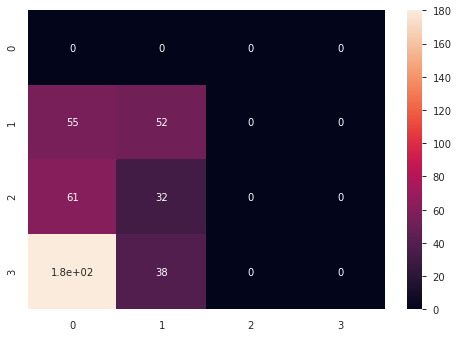

In [25]:
sns.heatmap(cm, annot=True)

In [26]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('new_submission_3.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
